In [1]:
#import packages & libraries
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import requests

In [2]:
def daily_price_historical(symbol, comparison_symbol, all_data=True, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.fromtimestamp(d) for d in df.time]
    return df

In [3]:
df = daily_price_historical('BTC','USD')

df.head(10)

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,timestamp
0,1279324800,0.04951,0.04951,0.04951,20.00,0.9902,0.04951,direct,,2010-07-17
1,1279411200,0.08585,0.05941,0.04951,75.01,5.0920,0.08584,direct,,2010-07-18
2,1279497600,0.09307,0.07723,0.08584,574.00,49.6600,0.08080,direct,,2010-07-19
3,1279584000,0.08181,0.07426,0.08080,262.00,20.5900,0.07474,direct,,2010-07-20
4,1279670400,0.07921,0.06634,0.07474,575.00,42.2600,0.07921,direct,,2010-07-21
5,1279756800,0.08181,0.05050,0.07921,2160.00,129.7800,0.05050,direct,,2010-07-22
6,1279843200,0.06767,0.05050,0.05050,2402.50,141.0700,0.06262,direct,,2010-07-23
7,1279929600,0.06161,0.05049,0.06262,496.32,26.7300,0.05454,direct,,2010-07-24
8,1280016000,0.05941,0.05050,0.05454,1551.48,85.0600,0.05050,direct,,2010-07-25
9,1280102400,0.05600,0.05000,0.05050,877.00,46.9100,0.05600,direct,,2010-07-26


In [4]:
df.tail(10)

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,timestamp
4607,1677369600,23673.78,23068.21,23167.45,27038.81,6.314675e+08,23557.39,direct,,2023-02-26
4608,1677456000,23876.65,23144.28,23557.39,44498.06,1.044207e+09,23490.07,direct,,2023-02-27
4609,1677542400,23596.23,23039.39,23490.07,34848.42,8.140387e+08,23134.20,direct,,2023-02-28
4610,1677628800,23962.77,23037.24,23134.20,45286.75,1.069269e+09,23641.20,direct,,2023-03-01
4611,1677715200,23788.72,23212.33,23641.20,34699.93,8.128111e+08,23467.22,direct,,2023-03-02
4612,1677801600,23476.96,22147.42,23467.22,59219.77,1.327278e+09,22361.45,direct,,2023-03-03
4613,1677888000,22410.72,22179.49,22361.45,11820.44,2.639006e+08,22351.08,direct,,2023-03-04
4614,1677974400,22632.51,22240.41,22351.08,20845.84,4.677936e+08,22433.65,direct,,2023-03-05
4615,1678060800,22596.13,22304.69,22433.65,27062.82,6.069781e+08,22410.34,direct,,2023-03-06
4616,1678147200,22540.33,22358.89,22410.34,6370.86,1.429750e+08,22377.28,direct,,2023-03-07


In [5]:
limit = datetime(2020,12,31)
start = datetime(2020,1,1)
df_train = df[(df['timestamp'] <= limit )]
df_train = df_train[(df_train['timestamp'] >= start)]

days = [val for val in df_train['timestamp'] ]
prices = [val for val in df_train['close'] ]
dict = {'Date': days, 'Close': prices}

In [6]:
df_train = pd.DataFrame(dict) 
filename = 'train_prices.csv'
df_train.to_csv(filename, index=False) 

print(f"{filename} created successfully.")

train_prices.csv created successfully.


In [7]:
#rename columns
prophet_df = df_train.rename(columns={'Date':'ds',
                                'Close':'y'})

#check
prophet_df.columns

Index(['ds', 'y'], dtype='object')

In [8]:
#initialize
model = Prophet()

#fit
model.fit(prophet_df)

11:21:14 - cmdstanpy - INFO - Chain [1] start processing
11:21:14 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
#forecast for the next 30 days
future = model.make_future_dataframe(periods=365)

#predict
forecast = model.predict(future)
     

#check out forecast
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,8357.552338,7249.360714,9734.916827,8357.552338,8357.552338,71.598412,71.598412,71.598412,71.598412,71.598412,71.598412,0.0,0.0,0.0,8429.150750
1,2020-01-02,8377.390654,7173.895361,9656.696359,8377.390654,8377.390654,49.914317,49.914317,49.914317,49.914317,49.914317,49.914317,0.0,0.0,0.0,8427.304971
2,2020-01-03,8397.228969,7128.573354,9555.998228,8397.228969,8397.228969,-46.577708,-46.577708,-46.577708,-46.577708,-46.577708,-46.577708,0.0,0.0,0.0,8350.651260
3,2020-01-04,8417.067284,7174.148909,9598.518414,8417.067284,8417.067284,-13.220692,-13.220692,-13.220692,-13.220692,-13.220692,-13.220692,0.0,0.0,0.0,8403.846591
4,2020-01-05,8436.905599,7225.354997,9583.912597,8436.905599,8436.905599,-85.610386,-85.610386,-85.610386,-85.610386,-85.610386,-85.610386,0.0,0.0,0.0,8351.295213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2021-12-27,87188.054855,62092.988904,115559.966503,62364.653124,115218.830369,0.019353,0.019353,0.019353,0.019353,0.019353,0.019353,0.0,0.0,0.0,87188.074207
727,2021-12-28,87361.344614,62462.802513,115013.188880,62405.322455,115512.962505,23.876705,23.876705,23.876705,23.876705,23.876705,23.876705,0.0,0.0,0.0,87385.221319
728,2021-12-29,87534.634373,62520.162508,116603.058099,62446.978285,115792.381685,71.598412,71.598412,71.598412,71.598412,71.598412,71.598412,0.0,0.0,0.0,87606.232785
729,2021-12-30,87707.924133,62974.593348,115730.003306,62510.534968,116087.589520,49.914317,49.914317,49.914317,49.914317,49.914317,49.914317,0.0,0.0,0.0,87757.838450


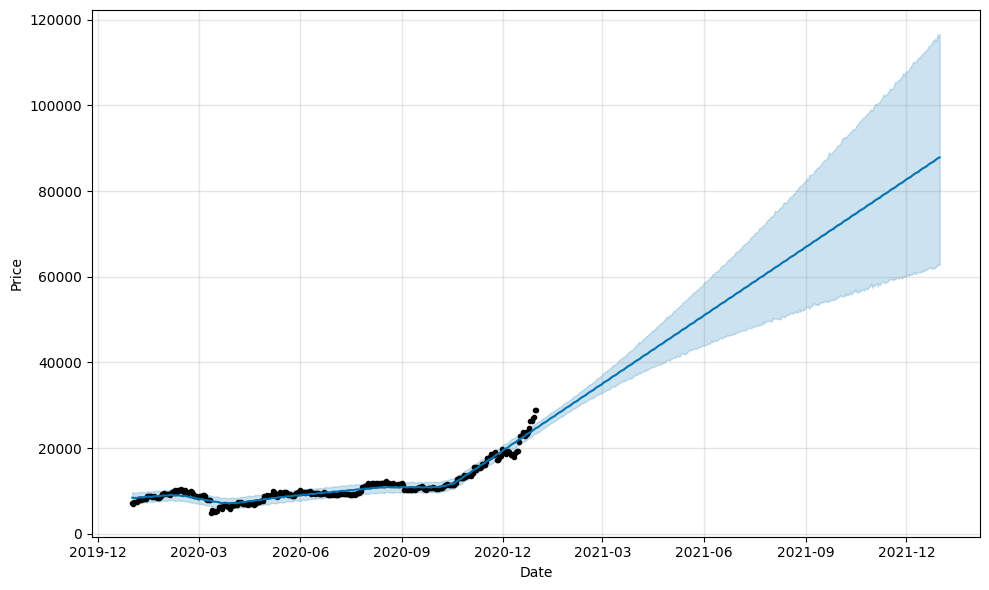

In [10]:
#visualize with Facebook internal tool
figure_1 = model.plot(forecast,
                    xlabel='Date',
                    ylabel='Price')

In [11]:
data = prophet_df[['ds','y']]
print(data)
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

            ds         y
0   2020-01-01   7189.94
1   2020-01-02   6965.72
2   2020-01-03   7339.70
3   2020-01-04   7357.50
4   2020-01-05   7359.96
..         ...       ...
361 2020-12-27  26249.27
362 2020-12-28  27039.45
363 2020-12-29  27360.78
364 2020-12-30  28889.61
365 2020-12-31  28972.40

[366 rows x 2 columns]


,ds,y
0,2020-01-01,7189.94
1,2020-01-02,6965.72
2,2020-01-03,7339.70
3,2020-01-04,7357.50
4,2020-01-05,7359.96


In [12]:
from neuralprophet import NeuralProphet

m = NeuralProphet()
neural_model = m.fit(data, freq='D', epochs=200)
future = m.make_future_dataframe(data, periods=365)
forecast = m.predict(future)
forecast.head()

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.727% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (23) is too small than the required number for the learning rate finder (216). The results might not be optimal.


Finding best initial lr:   0%|          | 0/216 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.727% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 23it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_weekly
0,2021-01-01,None,24114.230469,24189.021484,-74.791824
1,2021-01-02,None,24326.578125,24341.619141,-15.041412
2,2021-01-03,None,24408.000000,24494.208984,-86.209938
3,2021-01-04,None,24646.171875,24646.804688,-0.630629
4,2021-01-05,None,24810.847656,24799.394531,11.453533


In [13]:
forecast.tail(10)

,ds,y,yhat1,trend,season_weekly
355,2021-12-22,None,78449.023438,78359.679688,89.337898
356,2021-12-23,None,78588.156250,78512.273438,75.882378
357,2021-12-24,None,78590.070312,78664.859375,-74.791824
358,2021-12-25,None,78802.414062,78817.453125,-15.041412
359,2021-12-26,None,78883.835938,78970.046875,-86.209938
360,2021-12-27,None,79122.007812,79122.640625,-0.630629
361,2021-12-28,None,79286.687500,79275.234375,11.453533
362,2021-12-29,None,79517.171875,79427.828125,89.337898
363,2021-12-30,None,79656.312500,79580.421875,75.882378
364,2021-12-31,None,79658.226562,79733.015625,-74.791824


In [14]:
limit = datetime(2021,12,31)
start = datetime(2021,1,1)
df_real = df[(df['timestamp'] <= limit )]
df_real = df_real[(df_real['timestamp'] >= start)]

print(df_real)

            time      high       low      open  volumefrom      volumeto  \
3821  1609459200  29666.33  28748.21  28972.40    50841.73  1.487306e+09   
3822  1609545600  33257.29  29036.26  29388.94   119214.75  3.750441e+09   
3823  1609632000  34789.34  32010.59  32203.64    93510.99  3.132759e+09   
3824  1609718400  33622.70  28493.29  33063.48   124909.68  3.901979e+09   
3825  1609804800  34487.44  29985.29  32030.55    93735.47  3.037657e+09   
...          ...       ...       ...       ...         ...           ...   
4181  1640563200  52079.46  50481.26  50790.88    21873.37  1.120188e+09   
4182  1640649600  50718.53  47317.78  50714.73    40699.40  1.985905e+09   
4183  1640736000  48145.34  46107.79  47536.39    33749.80  1.599557e+09   
4184  1640822400  47917.89  45964.28  46471.70    39311.18  1.852207e+09   
4185  1640908800  48573.22  45665.44  47129.66    34737.79  1.636014e+09   

         close conversionType conversionSymbol  timestamp  
3821  29388.94         dire

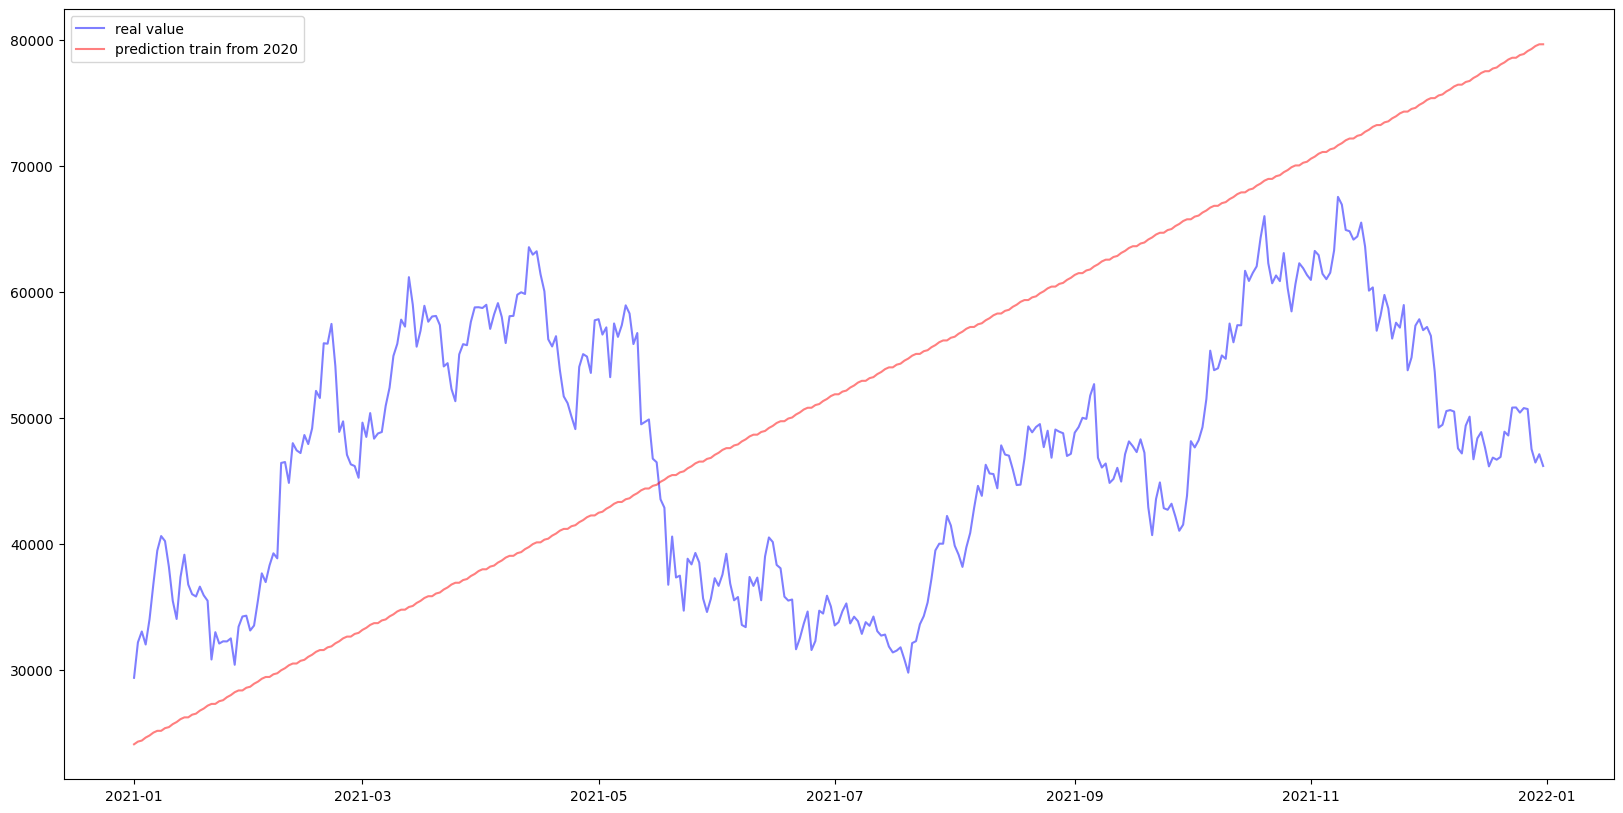

In [16]:
plt.figure(figsize=(20,10))
plt.plot(df_real['timestamp'], df_real['close'],color='blue',alpha=0.5, label="real value")
plt.plot(forecast['ds'], forecast['yhat1'],color='red',alpha=0.5, label="prediction train from 2020")
plt.legend()
plt.show()